## Project for Machine Learning and Statistics module
#### Hayley Doherty G00387849
---

This notebook shows how I developed a model that can be used to predict power output from a given wind speed value.  

Machine learning is used for complicated tasks that are too difficult and complex to be coded directly by humans.  In order to perform machine learning lots of data is needed to be used as examples of the correct output for a specified input in order to 'teach' the machine how to perform the task of generating output for input values it has not been trained with [1].

Neural networking is a machine learning technique that has become a popular tool for a range of applications such as speech recognition and image classification.  It is the technique I will use to develop a model that will be able to predict power output from a given wind speed value.

In [11]:
# import data
import pandas as pd
# create arrays
import numpy as np
# Creating Plots
import matplotlib.pyplot as plt
# neural networks
import tensorflow.keras as kr

In [29]:
# Read in csv 
df = pd.read_csv("powerproduction.csv")
df

,speed,power
0,0.000,0.0
1,0.125,0.0
2,0.150,0.0
3,0.225,0.0
4,0.275,0.0
...,...,...
495,24.775,0.0
496,24.850,0.0
497,24.875,0.0
498,24.950,0.0


In [30]:
# create variables for x and y axis
x = np.array(df['speed'])
y = np.array(df['power'])

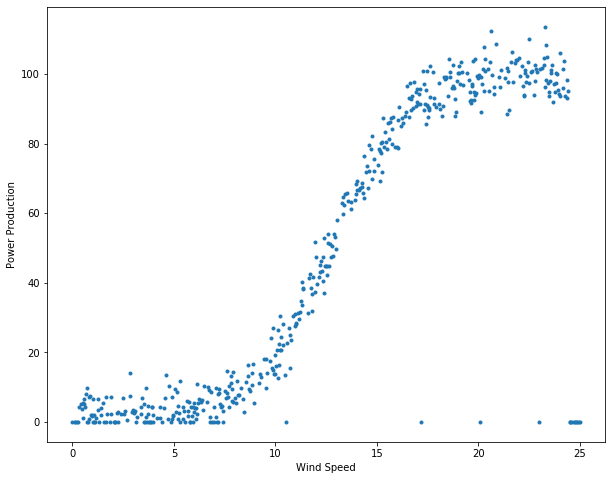

In [31]:
# plot the data
plt.figure(figsize=(10, 8))
plt.plot(x, y, '.')
plt.xlabel('Wind Speed')
plt.ylabel('Power Production')
plt.show()

#### Cleaned Data
***
Looking at the dataset to be used for developing the model, there are a number of points that look very different from the others.  For relatively high values for wind speed (over 7.5), some values for power production remain at zero.  This may suggest that the wind turbine was turned off or not working at these times as we would expect some generation of power at wind speeds above this level.  So in order to ensure that the model created is as accurate as possible at predicting the power production from a given wind speed, these outlying data points will be removed from the data used to train the model.

In [32]:
# deletes empty rows
df = df.dropna(how = 'all')
# delete rows where the power is 0 and wind speed is equal to or above 5
drop_rows = df[(df['power'] == 0) & (df['speed'] >= 5.0)].index
df.drop(drop_rows, inplace = True)

In [35]:
# the df now contain 477 rows meaning 23 were deleted
df

,speed,power
0,0.000,0.000
1,0.125,0.000
2,0.150,0.000
3,0.225,0.000
4,0.275,0.000
...,...,...
485,24.249,103.700
486,24.299,93.694
487,24.349,93.078
488,24.374,98.223


In [36]:
x = df['speed']
y = df['power']

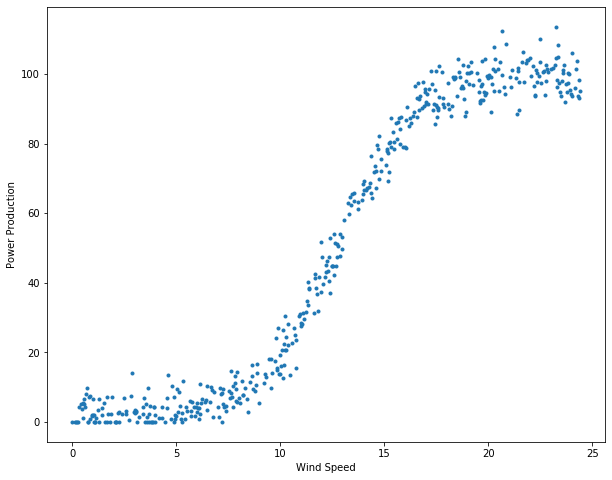

In [37]:
# a plot the data with the outliers removed
plt.figure(figsize=(10, 8))
plt.plot(x, y, '.')
plt.xlabel('Wind Speed')
plt.ylabel('Power Production')
plt.show()

In [12]:
model = kr.models.Sequential()
model.add(kr.layers.Dense(50, input_shape=(1,), activation='sigmoid', kernel_initializer="glorot_uniform", bias_initializer="glorot_uniform"))
model.add(kr.layers.Dense(1, activation='linear', kernel_initializer="glorot_uniform", bias_initializer="glorot_uniform"))
model.compile(kr.optimizers.Adam(lr=0.001), loss='mean_squared_error')

In [13]:
model.fit(x, y, epochs=500, batch_size=10)

Epoch 1/500
48/48 [==============================] - 0s 637us/step - loss: 4277.7079
Epoch 2/500
48/48 [==============================] - 0s 588us/step - loss: 4002.1965
Epoch 3/500
48/48 [==============================] - 0s 534us/step - loss: 3559.2186
Epoch 4/500
48/48 [==============================] - 0s 550us/step - loss: 3385.7851
Epoch 5/500
48/48 [==============================] - 0s 518us/step - loss: 3255.8407
Epoch 6/500
48/48 [==============================] - 0s 489us/step - loss: 2993.6543
Epoch 7/500
48/48 [==============================] - 0s 538us/step - loss: 2642.4861
Epoch 8/500
48/48 [==============================] - 0s 503us/step - loss: 2469.0951
Epoch 9/500
48/48 [==============================] - 0s 539us/step - loss: 2425.7980
Epoch 10/500
48/48 [==============================] - 0s 534us/step - loss: 2421.8052
Epoch 11/500
48/48 [==============================] - 0s 511us/step - loss: 2286.6429
Epoch 12/500
48/48 [==============================] - 0s 554us/

48/48 [==============================] - 0s 446us/step - loss: 86.4896
Epoch 98/500
48/48 [==============================] - 0s 446us/step - loss: 82.5190
Epoch 99/500
48/48 [==============================] - 0s 425us/step - loss: 75.9663
Epoch 100/500
48/48 [==============================] - 0s 505us/step - loss: 81.9219
Epoch 101/500
48/48 [==============================] - 0s 480us/step - loss: 76.2811
Epoch 102/500
48/48 [==============================] - 0s 446us/step - loss: 75.1251
Epoch 103/500
48/48 [==============================] - 0s 474us/step - loss: 73.4510
Epoch 104/500
48/48 [==============================] - 0s 466us/step - loss: 71.1849
Epoch 105/500
48/48 [==============================] - 0s 510us/step - loss: 68.6710
Epoch 106/500
48/48 [==============================] - 0s 473us/step - loss: 71.6108
Epoch 107/500
48/48 [==============================] - 0s 489us/step - loss: 71.9801
Epoch 108/500
48/48 [==============================] - 0s 446us/step - loss: 76.7

48/48 [==============================] - 0s 489us/step - loss: 43.4596
Epoch 194/500
48/48 [==============================] - 0s 513us/step - loss: 40.3414
Epoch 195/500
48/48 [==============================] - 0s 485us/step - loss: 41.0448
Epoch 196/500
48/48 [==============================] - 0s 473us/step - loss: 40.2891
Epoch 197/500
48/48 [==============================] - 0s 424us/step - loss: 43.2153
Epoch 198/500
48/48 [==============================] - 0s 425us/step - loss: 40.2099
Epoch 199/500
48/48 [==============================] - 0s 495us/step - loss: 42.4093
Epoch 200/500
48/48 [==============================] - 0s 468us/step - loss: 42.9803
Epoch 201/500
48/48 [==============================] - 0s 494us/step - loss: 39.9445
Epoch 202/500
48/48 [==============================] - 0s 455us/step - loss: 38.4393
Epoch 203/500
48/48 [==============================] - 0s 473us/step - loss: 40.7680
Epoch 204/500
48/48 [==============================] - 0s 482us/step - loss: 37

48/48 [==============================] - 0s 610us/step - loss: 21.3029
Epoch 290/500
48/48 [==============================] - 0s 636us/step - loss: 22.2706
Epoch 291/500
48/48 [==============================] - 0s 679us/step - loss: 23.2687
Epoch 292/500
48/48 [==============================] - 0s 679us/step - loss: 22.4906
Epoch 293/500
48/48 [==============================] - 0s 594us/step - loss: 23.4217
Epoch 294/500
48/48 [==============================] - 0s 509us/step - loss: 22.2422
Epoch 295/500
48/48 [==============================] - 0s 467us/step - loss: 22.2328
Epoch 296/500
48/48 [==============================] - 0s 467us/step - loss: 23.7438
Epoch 297/500
48/48 [==============================] - 0s 467us/step - loss: 22.8852
Epoch 298/500
48/48 [==============================] - 0s 488us/step - loss: 23.2712
Epoch 299/500
48/48 [==============================] - 0s 403us/step - loss: 21.1581
Epoch 300/500
48/48 [==============================] - 0s 493us/step - loss: 21

48/48 [==============================] - 0s 503us/step - loss: 18.2224
Epoch 386/500
48/48 [==============================] - 0s 459us/step - loss: 17.8188
Epoch 387/500
48/48 [==============================] - 0s 491us/step - loss: 17.9201
Epoch 388/500
48/48 [==============================] - 0s 467us/step - loss: 17.2093
Epoch 389/500
48/48 [==============================] - 0s 485us/step - loss: 18.3813
Epoch 390/500
48/48 [==============================] - 0s 483us/step - loss: 18.8480
Epoch 391/500
48/48 [==============================] - 0s 477us/step - loss: 18.7462
Epoch 392/500
48/48 [==============================] - 0s 493us/step - loss: 18.0699
Epoch 393/500
48/48 [==============================] - 0s 492us/step - loss: 17.5826
Epoch 394/500
48/48 [==============================] - 0s 482us/step - loss: 17.4141
Epoch 395/500
48/48 [==============================] - 0s 486us/step - loss: 17.7050
Epoch 396/500
48/48 [==============================] - 0s 493us/step - loss: 18

48/48 [==============================] - 0s 580us/step - loss: 16.7892
Epoch 482/500
48/48 [==============================] - 0s 645us/step - loss: 15.2654
Epoch 483/500
48/48 [==============================] - 0s 528us/step - loss: 17.1681
Epoch 484/500
48/48 [==============================] - 0s 521us/step - loss: 16.1147
Epoch 485/500
48/48 [==============================] - 0s 490us/step - loss: 15.5388
Epoch 486/500
48/48 [==============================] - 0s 487us/step - loss: 15.8150
Epoch 487/500
48/48 [==============================] - 0s 514us/step - loss: 17.0258
Epoch 488/500
48/48 [==============================] - 0s 483us/step - loss: 16.8471
Epoch 489/500
48/48 [==============================] - 0s 468us/step - loss: 15.8892
Epoch 490/500
48/48 [==============================] - 0s 483us/step - loss: 18.0794
Epoch 491/500
48/48 [==============================] - 0s 484us/step - loss: 17.1615
Epoch 492/500
48/48 [==============================] - 0s 538us/step - loss: 17

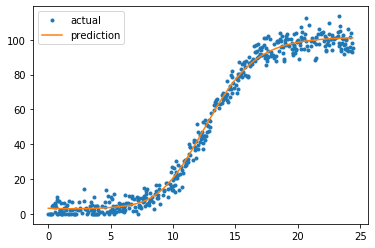

In [14]:
plt.plot(x, y, '.', label='actual')
plt.plot(x, model.predict(x), label='prediction')
plt.legend();

In [15]:
ws= [15.0]
model.predict(ws)

array([[77.219185]], dtype=float32)

In [ ]:
#def hello():
    #return 'hello'

### References
***
[1] a Gentle Introduction to Neural Newtorks for Machine Learning, https://www.codementor.io/@james_aka_yale/a-gentle-introduction-to-neural-networks-for-machine-learning-hkijvz7lp